In [0]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [0]:
#reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/fazlyrabbi77/DANGUE-Forcasting/master/dangueData.csv')



In [0]:
df.head()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DANGUE,LEVEL,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2008,1,12.993929,25.059539,78.824885,1.286636,0,1,NaN,NaN,NaN
1,2008,2,13.658286,26.383448,72.602956,0.687685,0,1,NaN,NaN,NaN
2,2008,3,20.411250,31.367558,76.903226,0.974194,0,1,NaN,NaN,NaN
3,2008,4,22.771889,34.031619,73.943810,0.980952,0,1,NaN,NaN,NaN
4,2008,5,23.945625,34.171060,77.360369,7.021198,0,1,NaN,NaN,NaN


In [0]:
#Dropping columns
df.drop(['DANGUE'], axis=1,inplace=True)

In [0]:
#dropping rows
df.drop([120,121,122,123,124,125,126,127,128,129,130,131,132,133],inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


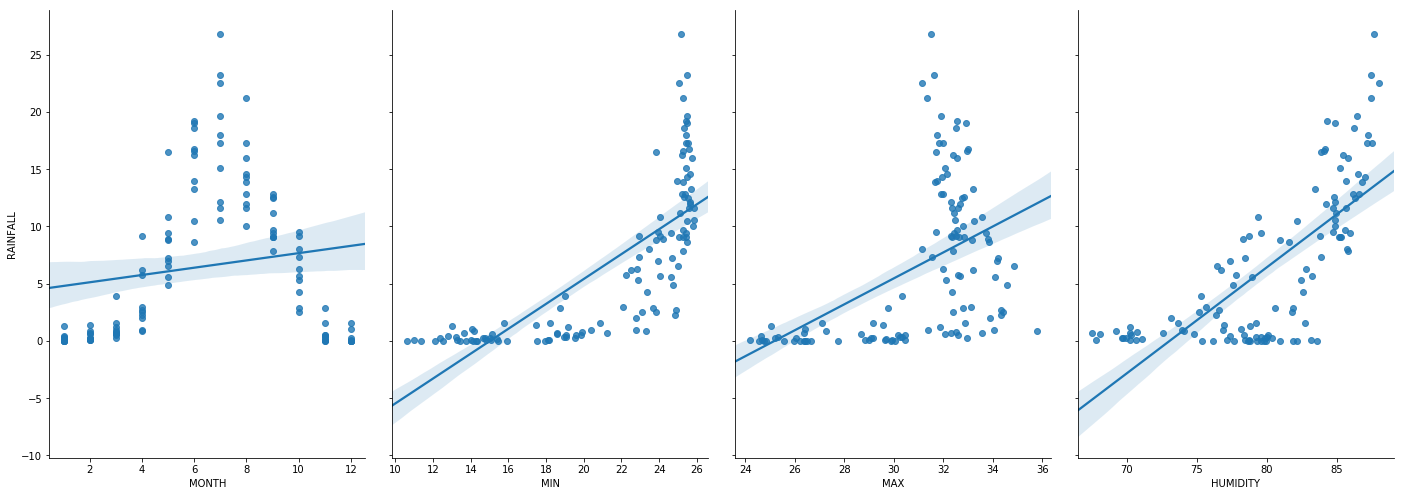

In [0]:
sns.pairplot(df, x_vars=['MONTH','MIN','MAX','HUMIDITY'], y_vars='RAINFALL', size=7, aspect=0.7, kind='reg')

In [0]:
#Defining Features & Label
x = df[['MONTH', 'MIN','MAX','HUMIDITY']]
y = df['RAINFALL']

In [0]:
#Building model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#defining prediction data frame 
predictions = linreg.predict(x_test)

In [0]:
#model performance
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [-0.51874877  2.4638665  -2.53717752  0.09165783]
Intercept: 29.27293562658023
MAE: 2.113388852595553
MSE: 7.030285493478454
RMSE: 2.6514685541183503
AccuracyII: 84.94358444384879 %


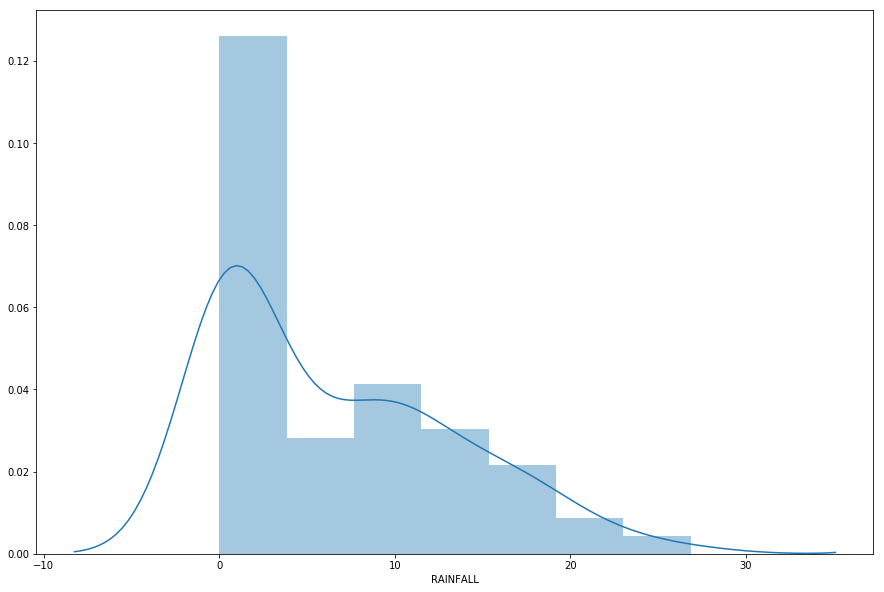

In [0]:
#performance plot
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['RAINFALL'])


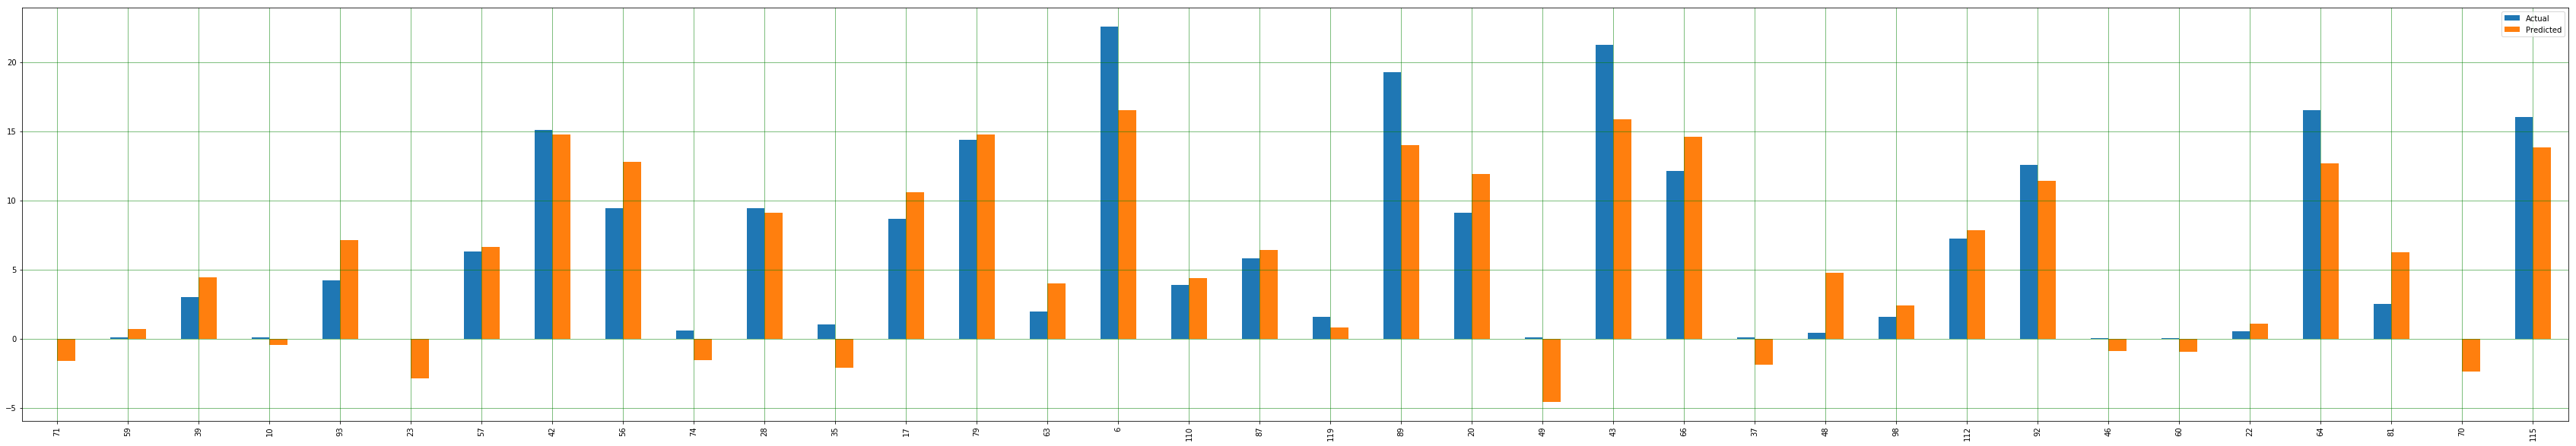

In [0]:
#actual vs predicted data frame
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [0]:
#prediction
new_observation = [[12,15.849552,27.017304	,82.580927]]
linreg.predict(new_observation)


array([1.12062296])

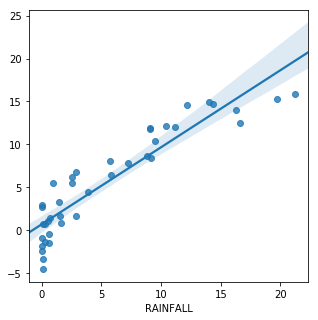

In [0]:
sns.regplot(x=y_test, y=predictions)


# Ploynomial

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_ = poly.fit_transform(x)
x_test_ = poly.fit_transform(x_test)

In [0]:
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(x_, y)

# Obtain coefficients
lg.coef_

array([-1.90680939e+04, -4.29251264e+05,  9.59816548e+05, -1.06087417e+06,
       -7.25510754e+04, -6.82096795e+03, -1.40393326e+04,  2.06391955e+04,
        1.28349902e+04,  3.77366093e+04, -9.67104667e+04, -1.81298812e+04,
        5.95795490e+04,  1.82794276e+04, -9.52398751e+01, -1.01374473e+01,
       -2.25846344e+02,  2.94074946e+02,  1.18675489e+02, -1.07366697e+02,
        3.28074254e+02,  3.15173097e+02, -2.47192559e+02, -4.56264397e+02,
       -1.22501265e+02,  5.48685801e+02, -2.25735388e+03, -5.11627045e+02,
        3.02062125e+03,  1.27698034e+03,  1.09913481e+02, -1.30893296e+03,
       -7.61462412e+02, -9.24167648e+01,  4.94365920e+00,  3.65215406e-01,
       -1.46345838e-01,  1.83273171e-01, -3.24588165e-02, -1.78664931e+00,
        4.71566716e+00,  2.00446318e+00, -3.11703161e+00, -2.56402745e+00,
       -5.07046989e-01,  8.85773951e-02, -2.15401769e-01,  1.63324209e+00,
        1.71761112e-01, -4.85609254e+00, -1.61525599e+00, -1.88028475e-02,
        3.55590890e+00,  

In [0]:
#defining prediction data frame 
predictions1 = lg.predict(x_test_)

In [0]:
#model performance
print('Coefficients:', lg.coef_)
print('Intercept:', lg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
accuracy = lg.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [-1.90680939e+04 -4.29251264e+05  9.59816548e+05 -1.06087417e+06
 -7.25510754e+04 -6.82096795e+03 -1.40393326e+04  2.06391955e+04
  1.28349902e+04  3.77366093e+04 -9.67104667e+04 -1.81298812e+04
  5.95795490e+04  1.82794276e+04 -9.52398751e+01 -1.01374473e+01
 -2.25846344e+02  2.94074946e+02  1.18675489e+02 -1.07366697e+02
  3.28074254e+02  3.15173097e+02 -2.47192559e+02 -4.56264397e+02
 -1.22501265e+02  5.48685801e+02 -2.25735388e+03 -5.11627045e+02
  3.02062125e+03  1.27698034e+03  1.09913481e+02 -1.30893296e+03
 -7.61462412e+02 -9.24167648e+01  4.94365920e+00  3.65215406e-01
 -1.46345838e-01  1.83273171e-01 -3.24588165e-02 -1.78664931e+00
  4.71566716e+00  2.00446318e+00 -3.11703161e+00 -2.56402745e+00
 -5.07046989e-01  8.85773951e-02 -2.15401769e-01  1.63324209e+00
  1.71761112e-01 -4.85609254e+00 -1.61525599e+00 -1.88028475e-02
  3.55590890e+00  2.31078396e+00  3.79349896e-01  2.73068140e+00
 -1.56951616e+01 -3.78456015e+00  3.30378933e+01  1.54320143e+01
  1.7247687

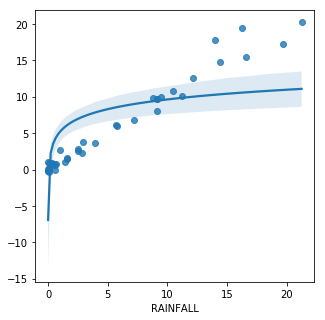

In [0]:
sns.regplot(y_test,predictions1, data=df, logx=True, truncate=True)

# XGBoost

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:linear',gamma=0,colsample_bytree = .5, learning_rate = 0.1,scale_pos_weight = 1, min_child_weight = 1, max_depth = 3)

In [0]:
xg_reg.fit(x, y)

[16:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

[16:56:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.955244


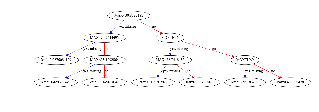

In [0]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=4)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

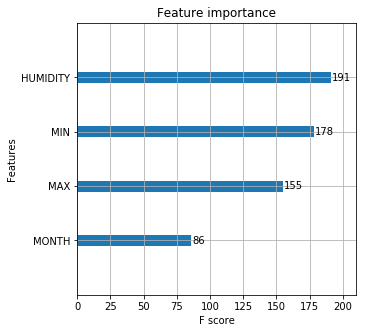

In [0]:

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [0]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test,preds))

0.900083688853891
